In [1]:
#import dependancies 
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#url set up
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
df = pd.read_html(url)

In [3]:
df = df[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
#checking data types
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [5]:
#converting terrestrial_date to a datetime datetype
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [6]:
#checking conversion
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
#How many months exist on mars?
month_count = df['month'].unique()
print(len(month_count))

12


In [8]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
df['sol'].sum()

1896256

In [9]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
avg_temps = df.groupby('month')['min_temp'].mean()
avg_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

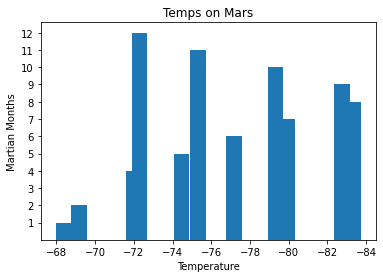

In [10]:
#bar chart of month temps
y = month_count
plt.bar(avg_temps, month_count)
plt.title('Temps on Mars')
plt.yticks(month_count)
plt.xlabel("Temperature")
plt.gca().invert_xaxis()
plt.ylabel("Martian Months")
plt.show()

In [11]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

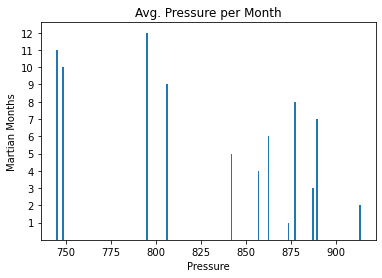

In [12]:
#bar chart of avg pressure
y = month_count
plt.bar(avg_pressure, month_count)
plt.title('Avg. Pressure per Month')
plt.yticks(month_count)
plt.xlabel("Pressure")
plt.ylabel("Martian Months")
plt.show()

In [13]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.